# **Pertemuan 6: Sampling Distributions**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

# Table of Contents
- [A. Nonparametric conﬁdence interval](#a)
- [B. Nonparametric hypothesis tests for one sample](#b)
    - [B.1 The sign test](#b1)
    - [B.2 Wilcoxon signed rank test](#b2)
    - [B.3 Dependent samples: paired comparison tests](#b3)
- [C. Nonparametric hypothesis tests for two independent samples](#c)
    - [C.1 Median test](#c1)
    - [C.2 Wilcoxon rank sum test](#c2)
- [D. Nonparametric hypothesis tests for $k\geq 2$ samples](#d)
    - [D.1 The Kruskal-Wallis test](#d1)
    - [D.2 The Friedman test](#d2)

Latihan **Soal 12.2.3** - *Buku Ramachandran Mathematical Statistics with Applications in R 3rd Edition*
<hr>

* Polusi udara di kota-kota besar di Amerika Serikat dipantau untuk melihat apakah sesuai dengan ketentuan yang ditetapkan oleh Badan Perlindungan Lingkungan (Environmental Protection Agency). Data berikut, yang dinyatakan sebagai indeks polusi udara, menunjukkan kualitas udara di suatu kota selama 10 hari yang dipilih secara acak:

| Hari | Indeks  |
|------|---------|
| 1    | 57.3    |
| 2    | 58.1    |
| 3    | 58.7    |
| 4    | 66.7    |
| 5    | 58.6    |
| 6    | 61.9    |
| 7    | 59.0    |
| 8    | 64.4    |
| 9    | 62.6    |
| 10   | 64.9    |


- (a) Buatlah probability plot dan lakukan pengujian apakah data tersebut berdistribusi normal.
- (b) Bangun interval kepercayaan 95% untuk median sebenarnya dari indeks polusi udara kota tersebut dan interpretasikan maknanya.

* Perhatikan bahwa kita menggunakan interval kepercayaan 95%, artinya nilai $\alpha=5%=0.05$. 
* Karena di sini kita mau menghitung median, maka kita perangkap median itu di dua batas, yakni batas atas dan batas bawah.
* Masing-masing di $\frac{\alpha}{2}=0.025$.
* Tinjau tabel binomial, saat n=10 dan p=1/2, berapa X terkecil yang memenuhi $P(X\leq 0.5)\leq 0.025$
* Dari tabel kita bisa baca, bahwa nilai maksimum n yang memenuhi sehingga $P(X\leq 0.5)\leq 0.025$ adalah 1.
* n+1-a=10+1-1=10
* Maka kita gunakan data pertama s.d. data ke 10 untuk batas median.

In [8]:
# Parameter binomial
n <- 10
p <- 0.5

# Hitung nilai x dari 0 sampai 10
x <- 0:10

# Hitung probabilitas kumulatif P(X <= x)
cumulative_prob <- pbinom(x, size = n, prob = p)

# Buat data frame
binomial_table <- data.frame(
  x = x,
  P_X_less_equal_x = round(cumulative_prob, 4)
)
binomial_table

x,P_X_less_equal_x
<int>,<dbl>
0,0.0010
1,0.0107
2,0.0547
3,0.1719
4,0.3770
5,0.6230
6,0.8281
7,0.9453
8,0.9893


In [3]:
# Cumulative probability for Binomial(n = 20, p = 0.5) up to x = 5
pbinom(5, size = 20, prob = 0.5)

[1] 0.02069473

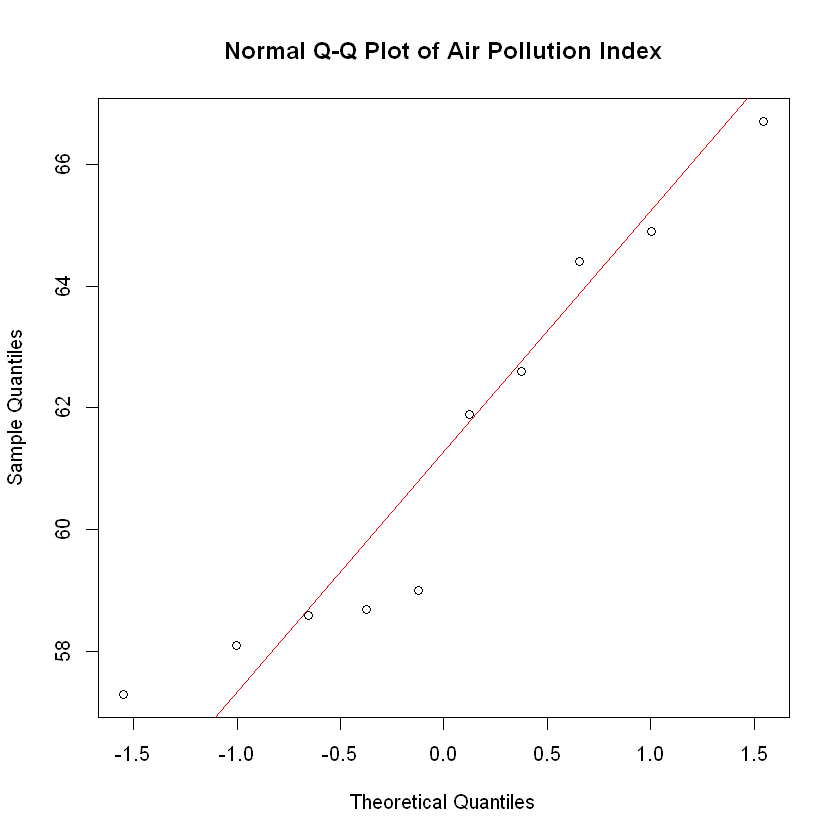

In [1]:
# Probability Plot
indeks <- c(57.3, 58.1, 58.7, 66.7, 58.6, 61.9, 59.0, 64.4, 62.6, 64.9)

# Q-Q Plot
qqnorm(indeks, main = "Normal Q-Q Plot of Air Pollution Index")
qqline(indeks, col = "red")

In [ ]:
# 1. Nonparametric conﬁdence interval
# 2. Nonparametric hypothesis tests for one sample
## 2.1 The sign test
## 2.2 Wilcoxon signed rank test
## 2.3 Dependent samples: paired comparison tests
# 3. Nonparametric hypothesis tests for two independent samples
## 3.1 Median test
## 3.2 The Wilcoxon rank sum test
# 4. Nonparametric hypothesis tests for $k\geq 2$ samples
## 4.1 The Kruskal-Wallis test
## 4.2 The Friedman test

Latihan **Soal 12.3.2** - *Buku Ramachandran Mathematical Statistics with Applications in R 3rd Edition*
<hr>

* Dipercaya bahwa sebuah keluarga pada umumnya menghabiskan 35% dari pendapatannya untuk makanan dan belanja kebutuhan sehari-hari. 
* Dari sampel delapan keluarga yang dipilih secara acak, diperoleh data persentase pengeluaran sebagai berikut:

|  Keluarga        | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
|----------|-----|-----|-----|-----|-----|-----|-----|-----|
| (%) Pengeluaran | 30  | 29  | 39  | 49  | 36  | 33  | 37  | 35  |


* Ujilah
  * hipotesis bahwa median persentase pengeluaran keluarga untuk makanan dan kebutuhan sehari-hari adalah 35%
  * hipotesis alternatif bahwa median tersebut kurang dari 35%.
* Gunakan tingkat signifikansi α = 0,05.

| Keluarga | (%) Pengeluaran | $Zi= |xi - 35|$ | Tanda | Peringkat |
|----------|------------------|-------------------------------|--------|-----------|
| 1        | 30               | 5                             | -      | 5         |
| 2        | 29               | 6                             | -      | 6         |
| 3        | 39               | 4                             | +      | 4         |
| 4        | 49               | 14                            | +      | 7         |
| 5        | 36               | 1                             | +      | 1         |
| 6        | 33               | 2                             | -      | 2.5       |
| 7        | 37               | 2                             | +      | 2.5       |
| 8        | 35               | 0                             | *      | abaikan   |

In [15]:
# Function to compute Z statistic for Wilcoxon signed-rank test
wilcoxon_z <- function(W_plus, n) {
  numerator <- W_plus - (1/4) * n * (n + 1)
  denominator <- sqrt(n * (n + 1) * (2 * n + 1) / 24)
  Z <- numerator / denominator
  return(Z)
}

# Example usage:
wilcoxon_z(W_plus = 14.5, n = 7)

[1] 0.08451543

📉 Uji Dua Sisi (α = 0,05)
Untuk n = 7 (setelah abaikan nilai nol), kita lihat tabel distribusi kritis Wilcoxon dua sisi.

Nilai kritis (two-tailed) untuk n = 7, α = 0.05 → W ≤ 2

📚 (Bisa kamu lihat di tabel Wilcoxon signed-rank critical values)

✅ Kesimpulan:
Karena W = 13.5 > 2, maka:

Gagal tolak H₀

📌 Interpretasi:
Tidak ada cukup bukti untuk menyimpulkan bahwa median pengeluaran berbeda dari 35% pada tingkat signifikansi 5%.

📉 Conclusion (α = 0.05, one-tailed test)
This is a left-tailed test (alternative: median < 35)

Critical value 
𝑍
0.05
=
−
1.645
Z 
0.05
​
 =−1.645

Our Z = 0.0845 > -1.645 → Not in rejection region

❌ Kesimpulan:
Tidak terdapat cukup bukti untuk menyimpulkan bahwa median pengeluaran kurang dari 35% pada tingkat signifikansi 5%.

Latihan **Soal 12.3.7** - *Buku Ramachandran Mathematical Statistics with Applications in R 3rd Edition*
<hr>

Suatu penelitian bertujuan untuk mengkaji pengaruh diet khusus terhadap tekanan darah sistolik. Data berikut diperoleh dari delapan orang dewasa berusia di atas 40 tahun, diukur sebelum dan sesudah menjalani diet selama 6 bulan:

|        | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|
| Sebelum | 185 | 222 | 235 | 198 | 224 | 197 | 228 | 234 |
| Sesudah  | 188 | 217 | 229 | 190 | 226 | 185 | 225 | 231 |


Dengan tingkat kepercayaan 95%, apakah terdapat cukup bukti untuk menyimpulkan bahwa diet baru ini dapat menurunkan tekanan darah sistolik pada individu berusia di atas 40 tahun?

Lakukan pengujian berikut:
(a) Menggunakan uji tanda (sign test)
(b) Menggunakan uji Wilcoxon dengan peringkat bertanda (Wilcoxon signed-rank test)

Jelaskan serta interpretasikan hasil pengujian.

In [ ]:
| Observasi | Sebelum | Sesudah | Penurunan | Tanda |
|-----------|---------|---------|------------|-------|
| 1         | 185     | 188     | -3          | +     |
| 2         | 222     | 217     | +5         | -     |
| 3         | 235     | 229     | +6         | -     |
| 4         | 198     | 190     | +8         | -     |
| 5         | 224     | 226     | 2          | +     |
| 6         | 197     | 185     | -12        | -     |
| 7         | 228     | 225     | -3         | -     |
| 8         | 234     | 231     | -3         | -     |


Latihan **Soal 12.4.6** - *Buku Ramachandran Mathematical Statistics with Applications in R 3rd Edition*
<hr>

* Dua kelompok petak lahan seluas 1 acre yang dipilih secara acak diperlakukan dengan dua merek pupuk yang berbeda. Data berikut menunjukkan hasil panen jagung (dalam bushel) dari masing-masing petak lahan:

|             | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
|-------------|-----|-----|-----|-----|-----|-----|-----|-----|
| Pupuk I     | 89  | 93  | 105 | 94  | 92  | 96  | 93  | 101 |
| Pupuk II    | 85  | 88  | 94  | 87  | 86  | 91  |     |     |
* Gunakan data di atas untuk menentukan apakah terdapat perbedaan hasil panen antara dua merek pupuk tersebut.
* Gunakan tingkat signifikansi α = 0,01.
* Sebutkan pula asumsi-asumsi yang kamu gunakan dalam menyelesaikan masalah ini.

Latihan **Soal 12.5.6** - *Buku Ramachandran Mathematical Statistics with Applications in R 3rd Edition*
<hr>

* Untuk mempelajari pengaruh pupuk terhadap hasil panen, lima kelompok lahan berukuran 1 acre dipilih secara acak. Satu kelompok tidak diberi pupuk sama sekali, sedangkan empat kelompok lainnya diberi empat merek pupuk yang berbeda.
* Tabel 12.19 di bawah ini menunjukkan hasil panen jagung (dalam bushel) dari masing-masing petak lahan:
* Gunakan data tersebut untuk menentukan apakah terdapat perbedaan hasil panen antar berbagai jenis pupuk.
* Gunakan tingkat signifikansi α = 0,01.

| Kelompok       | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  |
|----------------|----|----|----|----|----|----|----|----|
| Tanpa Pupuk    | 58 | 27 | 36 | 41 | 48 | 36 | 50 | 39 |
| Pupuk I        | 69 | 67 | 57 | 63 | 49 | 65 | 78 | 69 |
| Pupuk II       | 95 | 92 | 92 | 89 |100 | 88 | 97 | 75 |
| Pupuk III      |102 |111 | 92 |103 |102 | 94 |100 | 96 |
| Pupuk IV       |127 |115 |112 |122 |114 |107 |116 |108 |
